# Mobile Price Classification
Nama : M Dicky Alfansyah

Nim : 183510468

Sumber dataset : https://www.kaggle.com/iabhishekofficial/mobile-price-classification



In [1]:
# The libraries & modules which we are going to use in our study:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#meload dataset dari google drive

url_dataset_train = 'https://drive.google.com/file/d/1XE8N1yswNKIKG6lqkI5t9zDS3bBmH1Vo/view?usp=sharing'
url_dataset_test = 'https://drive.google.com/file/d/1bwsJg9N2OkRg17-GUkVcqIPdNg4xmM0P/view?usp=sharing'
path_train = 'https://drive.google.com/uc?export=download&id='+url_dataset_train.split('/')[-2]
path_test = 'https://drive.google.com/uc?export=download&id='+url_dataset_test.split('/')[-2]

dataset_test = pd.read_csv(path_test)
dataset_train = pd.read_csv(path_train)
dataset_train.head(5) #menampilkan beberapa dataset train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
#menampilkan atribut data kolom dari dataset
dataset_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
#menampilkan jumlah sampel dan atribut
dataset_train.shape

(2000, 21)

In [5]:
#menampilkan tipe data masing-masing aatribut
dataset_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
#melakukan pendeskripsian untuk menghitung dan menampilkan statistik ringkasan dataset
dataset_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


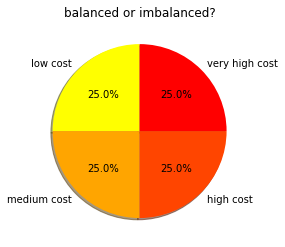

In [7]:
#membuat klasifikasi rentang harga dengai nilai target yang akan digunakan untuk melakukan klasifikasi multi-kelas

y = dataset_train['price_range']
x = dataset_train.drop('price_range', axis = 1)

#melihat dataset seimbang atau tidak seimbang
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = dataset_train['price_range'].value_counts().values
colors = ['yellow','orange','orangeRed', 'red']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('balanced or imbalanced?')
plt.show() #menampilkan dataset


Dari load data terdapat 2 dataset yakni train dan test tetapi disini hanya menguji untuk dataset train dikarenakan pada data test tidak memiliki data target untuk dapat melakukan pengujian model, untuk dataset test nantinya akan digunakan untuk melihat akurasi dalam penerapan dataset validasi

In [8]:
#memeriksa dataset apakah sudah berfungsi dengan benar
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify = y)

#menampilkan hasil
print(x_train.shape)
print(x_valid.shape)


(1600, 20)
(400, 20)


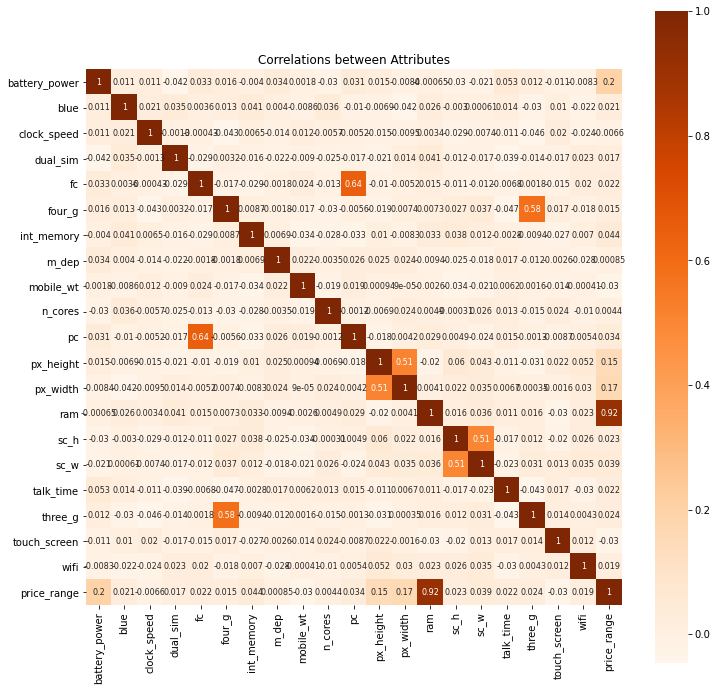

In [9]:
#membuat plot headmap untuk membuat korelasi antar atribut 

fig = plt.subplots (figsize = (12, 12))
sns.heatmap(dataset_train.corr (), square = True, cbar = True, annot = True, cmap="Oranges", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show () #menampilkan hasil

Dari plot headmap terlihat bahwa variabel atribut yang paling berpengaruh adalah ram serta terdapat sebagian besar variabel memiliki korelasi yang sangat kecil.

## Model Logistic Regression 

In [10]:
#membuat klasifikasi logistic regresi dengan multi kelas
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', solver='sag')

In [11]:
#membuat nilai kebenaran validasi dengan menampilkan dalam bentuk array confusion matrix
y_pred_lr = lr.predict(x_valid)
confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_lr)
confusion_matrix

array([[88, 11,  1,  0],
       [ 8, 64, 25,  3],
       [ 0, 13, 58, 29],
       [ 0,  1, 17, 82]], dtype=int64)

In [12]:
#menentukan tingkat akurasi dari nilai prediksi dan nilai validasi
acc_lr = metrics.accuracy_score(y_valid, y_pred_lr)
acc_lr

0.73

# Model Random Forest

In [13]:
#membuat data latih klasifikasi dengan RandomForest untuk meningkatkan akurasi dibandingkan dengan model pohon keputusan sederhana

rf = RandomForestClassifier(n_estimators = 100, random_state=101, criterion = 'entropy', oob_score = True) 
model_rf = rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_valid)


print(metrics.confusion_matrix(y_valid, y_pred_rf)) #tampilkan hasil

[[91  9  0  0]
 [ 3 91  6  0]
 [ 0  7 85  8]
 [ 0  0  6 94]]


In [14]:
#membuat confusion matrix untuk menghasilkan value Predicted Class dan value Actual Class 
pd.crosstab(y_valid, y_pred_rf, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,91,9,0,0
1,3,91,6,0
2,0,7,85,8
3,0,0,6,94


In [15]:
#menentukan tingkat akurasi dari nilai prediksi dan nilai validasi
acc_rf = metrics.accuracy_score(y_valid, y_pred_rf)
acc_rf

0.9025

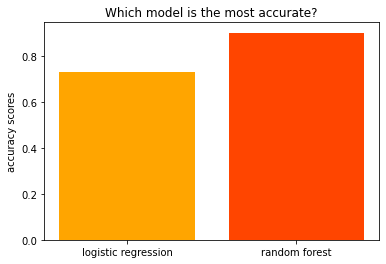

In [16]:
#menentukan perbandingan hasil dari model logistic regression dan random forest manakah yang paling akurat
models = ['logistic regression','random forest']
acc_scores = [0.73,0.90]

plt.bar(models, acc_scores, color=['orange', 'orangeRed'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show() #menampilkan hasil

Dari hasil score terlihat nilai akurasi tertinggi yakni random foresh maka selanjutnya menggunakan random foresh untuk memprediksi nilai target pada dataset uji dan menambahkan label ke dataset 

In [17]:
#menampilkan dataset test
dataset_test=dataset_test.drop('id',axis=1) #karena pada kolom dataset train tidak memiliki id maka untuk itu pada dataset test kolom id dihapus
dataset_test.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [18]:
#melakukan prediksi price_range  dataset test
predicted_price_range = rf.predict(dataset_test)
predicted_price_range

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 0, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 0, 3, 3, 2, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 1, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 2, 0, 3, 1, 2, 0,
       0, 2, 0, 2, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 1, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 0, 2, 3, 1,

In [19]:
#menentukan hasil price_range dari dataset test
dataset_test['price_range'] = predicted_price_range
dataset_test.head(10) #menampilkan hasil

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
5,1464,1,2.9,1,5,1,50,0.8,198,8,...,569,939,3506,10,7,3,1,1,1,3
6,1718,0,2.4,0,1,0,47,1.0,156,2,...,1283,1374,3873,14,2,10,0,0,0,3
7,833,0,2.4,1,0,0,62,0.8,111,1,...,1312,1880,1495,7,2,18,0,1,1,1
8,1111,1,2.9,1,9,1,25,0.6,101,5,...,556,876,3485,11,9,10,1,1,0,3
9,1520,0,0.5,0,1,0,25,0.5,171,3,...,52,1009,651,6,0,5,1,0,1,0


# Penjelasan Singkat
Dari semua rangkaian latih data set, tujuan melakukan latih data set yakni untuk  memperkirakan kisaran harga untuk ponsel dalam kumpulan data baru